# __Data exploration and imputation__

In [1]:
import pandas as pd

### __Loading our file__

In [2]:
file_path = '../data/marginal_emissions.pkl'

In [3]:
df = pd.read_pickle(file_path)
df.head()

,DateTime,t CO2-e / MWh
0,2019-08-01 03:55:00,0.380340
1,2019-08-01 03:50:00,0.456409
2,2019-08-01 03:45:00,0.573436
3,2019-08-01 03:40:00,0.573436
4,2019-08-01 03:35:00,0.573436


In [4]:
df.shape

(1006719, 2)

In [4]:
file_path = '../data/marginal_emissions_dtindex.pkl'
df = pd.read_pickle(file_path)

In [6]:
df.shape

(1006719, 1)

In [6]:
df.index[3]

Timestamp('2019-08-01 03:40:00', freq='-5T')

In [46]:
type(df.index[3])

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
time_difference = df.index[3] - df.index[4]
time_difference

Timedelta('0 days 00:05:00')

In [54]:
type(time_difference)

pandas._libs.tslibs.timedeltas.Timedelta

In [55]:
time_difference.total_seconds()

300.0

### __Exercise__

From start to end, the index of our dataframe should increment in 5 min intervals.

__Task 1:__

Check the datatype of the "DateTime" column of our dataframe "df".
Change the index of our dataframe "df" to a DateTimeIndex, using our "DateTime" column.
Make sure you get rid of the original index column (starting with: 0, 1, 2, 3,...).

__Task 2:__

Write a function which takes in our dataframe "df" and checks if the index of our dataframe entirely increments in 5 min intervals. If your fucntions finds any interval not equal to 5 min, it should return the position where this occurs (e.g. row 783) and duration of the interval at that position (e.g. row 783: 25 min).

__Task 3:__

If you find any such different intervals, modify our dataframe index so that it entirely increments in 5 min intervals. __Hint:__ check out the pd.data_range() and DataFrame.reindex() methods.

__Note:__

Use your knowledge from your pandas lecture and use Google as your best friend.

In [38]:
df.DateTime = pd.to_datetime(df.DateTime)

df.set_index('DateTime', inplace = True, drop = True)

In [52]:
#df.to_pickle('../data/marginal_emissions_dtindex.pkl')

### __Solution 1__

In [8]:

#change the dataframe index to a DateTimeIndex here


### __Solution 2__

In [53]:
def correct_timedelta(df, time_diff):
    '''
    df.index must be DateTimeIndex
    Returns two lists
    df=table_of_interest
    col="column_of_interest"
    time_diff=time_diff in seconds as int
    '''
    lst = []
    lst_i = []
    
    for i in range(1,df.shape[0]):
        delta = abs(df.index[i] - df.index[i-1])
        if int(delta.total_seconds()) != int(time_diff):
            lst.append(("from index {} on, it has been {} s or {} h.".format(i,int(delta.total_seconds()),(int(delta.total_seconds()/3600)))))
            lst_i.append((df.index[i],int(delta.total_seconds())))
            
    return lst, lst_i

In [48]:
def correct_timedelta(df, time_diff):

#your code here

    return index_and_duration_of_any_non_5min_time_gap

In [10]:

#see what your output is


In [108]:
lst, lst_i = correct_timedelta(df, 300)

In [120]:
for i in range(len(lst_i)):
    if lst_i[i][1] > 10000:
        print(lst_i[i], lst[i])

(Timestamp('2018-11-01 03:55:00'), 2592300) from index 69099 on, it has been 2592300 s or 720 h.
(Timestamp('2018-06-01 03:55:00'), 2592300) from index 104169 on, it has been 2592300 s or 720 h.


### __Solution 3__

In [5]:
#hypothetical number of 5min intervals given the max and min values of the df time range
new_time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="5min")
len(new_time_range)

1060704

In [6]:
df_new = df.reindex(new_time_range).sort_index(ascending=False)
df_new.shape

(1060704, 1)

In [20]:
#file_path = '../data/marginal_emissions_dtindex.pkl'
#pd.to_pickle(df_new, file_path)

In [7]:
df.isna().any()

t CO2-e / MWh    False
dtype: bool

In [8]:
df_new.isna().any()

t CO2-e / MWh    True
dtype: bool

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

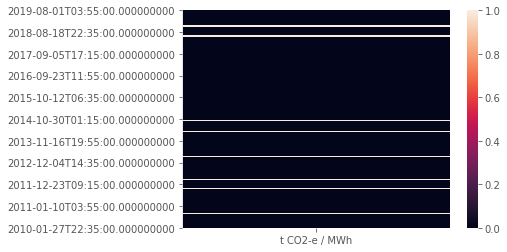

In [10]:
plt.style.use('ggplot')

fig = sns.heatmap(df_new.isna(), yticklabels=100000)

### __Data imputation of time series__

In [93]:

#sketch on whiteboard


In [94]:
import numpy as np

In [95]:
df_impute = df_new.assign(rolling_mean=df_new['t CO2-e / MWh'].rolling(window=12, min_periods=1).mean())

In [96]:
df_impute.head()

,t CO2-e / MWh,rolling_mean
2019-08-01 03:55:00,0.380340,0.380340
2019-08-01 03:50:00,0.456409,0.418374
2019-08-01 03:45:00,0.573436,0.470062
2019-08-01 03:40:00,0.573436,0.495905
2019-08-01 03:35:00,0.573436,0.511412


In [97]:
df_impute.isna().any()

t CO2-e / MWh    True
rolling_mean     True
dtype: bool

In [98]:
df_impute['t CO2-e / MWh'] = np.where(df_impute['t CO2-e / MWh'].isnull(),\
                                  df_impute['rolling_mean'], df_impute['t CO2-e / MWh'])

df_impute.drop(columns='rolling_mean', inplace=True)

In [99]:
df_impute.isna().any()

t CO2-e / MWh    True
dtype: bool

### __Why are we still left with 2 gaps?__

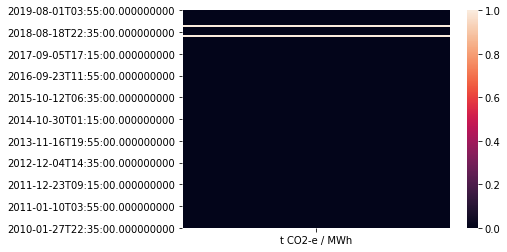

In [101]:
fig = sns.heatmap(df_impute.isna(), yticklabels=100000)

In [127]:
import datetime as dt

df = df[df.index <= dt.datetime(2018,6,1,4,0,0)]

In [128]:
df.index.max()

Timestamp('2018-06-01 03:55:00')

In [129]:
df.to_pickle('../data/marginal_emissions_dtindex1.pkl')